In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt


In [3]:
RESULTS_CSV = 'survey_results_2609.csv'

In [4]:
results_df = pd.read_csv(RESULTS_CSV, header=0, skiprows=[1,2], sep=";")

In [5]:
print(f"{len(results_df)} participants")
print("-"*50)
ai_knowledge = results_df['AiKnowledge'].value_counts()
print(f"AI knowledge counts:\n{ai_knowledge}")
print("-"*50)
occupations = results_df['Occupation']
# print 5 occupations then a new line, then 5 more, etc.
print("Occupations:")
for i in range(0, len(occupations), 5):
    print(", ". join(occupations[i:i+5]))


22 participants
--------------------------------------------------
AI knowledge counts:
I have significant knowledge about AI    14
I have little knowledge about AI          5
I have negligible knowledge about AI      3
Name: AiKnowledge, dtype: int64
--------------------------------------------------
Occupations:
PhD, comuter science, MSc Artificial Intelligence student, Data scientist, MSc Student: AI, Computer Science
Statistics and Data Science, student/ MSc Data Science, Student, Masters Computer Science (AI), Student, AI, PhD candidate in NLP
Student: Master in Data Science, Student, Bioinformatics, Student(data science), PhD researcher - AI, PhD in AI
computer science student, Data Science, Researcher, Researcher, data scientist
Student, AI Master's, AI


In [60]:
plt.rcParams.update({'font.size': 12.5})

def rename_columns(df):
    df_copy = df.copy()
    aspect_2_idx = {
        "Overall": 1,
        "Fluency": 2,
        "Factuality": 3,
        "Coherence": 4,
        "Informativeness" : 5,
        "Non-redundancy": 6,
        "Blog-structure": 7
    }

    for col in df_copy.columns:
        if '#1' in col:
            comparison_name = col.split('#')[0]
            aspect_idx = int(col.split('_')[-1])
            aspect_name = list(aspect_2_idx.keys())[list(aspect_2_idx.values()).index(aspect_idx)]
            df_copy.rename(columns={col: f"{aspect_name}"}, inplace=True)
    return df_copy

def replace_with_numeric(df):
    df_copy = df.copy()
    #replace all 'Blog A' values with 1, all 'Blog B' values with 2 and all other non null values with 0
    df_copy = df_copy.replace(to_replace=['No preference / I do not know', 'Blog A', 'Blog B'], value=[0, 1, 2])
    return df_copy

def pieplot(df):
    num_df = replace_with_numeric(df)
    for col in num_df.columns:
        fig = px.pie(num_df, names=col, title=col, color_discrete_map={0: 'grey', 1: 'blue', 2: 'red'})
        fig.show()
    print(num_df)
    
def barplot(df, blog_a="automated", blog_b="baseline"):
    df = df.replace({"Blog A": blog_a, "Blog B": blog_b})

    def generate_single_bar_plot(ax, column_name, df, blog_a, blog_b):
        frequencies = df[column_name].value_counts()
        preferences = [blog_a, 'No preference / I do not know', blog_b]
        freq_values = [frequencies.get(pref, 0) for pref in preferences]
        total = sum(freq_values)
        percentages = [f"{(value / total) * 100:.1f}%" for value in freq_values]
        colors = ['blue', 'orange', 'green']
        
        ax.barh(0, freq_values[0], color=colors[0], label=preferences[0], height=0.3,)
        ax.barh(0, freq_values[1], left=freq_values[0], color=colors[1], label=preferences[1], height=0.3)
        ax.barh(0, freq_values[2], left=freq_values[0] + freq_values[1], color=colors[2], label=preferences[2], height=0.3)
        
        if freq_values[0] > 0:
            ax.text(freq_values[0] / 2, 0, percentages[0], ha='center', va='center', color='white', fontsize=10)
        if freq_values[1] > 0:
            ax.text(freq_values[0] + freq_values[1] / 2, 0, percentages[1], ha='center', va='center', color='white', fontsize=10)
        if freq_values[2] > 0:
            ax.text(freq_values[0] + freq_values[1] + freq_values[2] / 2, 0, percentages[2], ha='center', va='center', color='white', fontsize=10)

        ax.set_title(column_name, x=-0.15,y=0.2)
        ax.set_yticks([])
        ax.set_xticks([])

        for spine in ax.spines.values():
            spine.set_visible(False)
            
    columns = ['Overall', 'Fluency', 'Factuality', 'Coherence', 'Informativeness', 'Non-redundancy', 'Blog-structure']

    fig, axes = plt.subplots(nrows=len(columns), ncols=1, figsize=(9, 6), sharey=True)

    for i, column in enumerate(columns):
        generate_single_bar_plot(axes[i], column, df, blog_a, blog_b)

    fig.legend(axes[0].get_children()[:3], [blog_a, 'No preference / I do not know', blog_b], loc='upper center', ncol=3)

    plt.show()
    

In [56]:
# present columns with name starting with 'CoverageVsHuman' or 'BalancedVsHuman'

# CoverageVsHuman
coverage_vs_human_cols = [col for col in results_df.columns if col.startswith('CoverageVsHuman#1')]
coverage_vs_human_df = results_df[coverage_vs_human_cols]

# CoverageVsBaseline
coverage_vs_baseline_cols = [col for col in results_df.columns if col.startswith('CoverageVsBaseline#1')]
coverage_vs_baseline_df = results_df[coverage_vs_baseline_cols]
coverage_vs_baseline_df = coverage_vs_baseline_df.replace({"Blog C": "Blog B"})


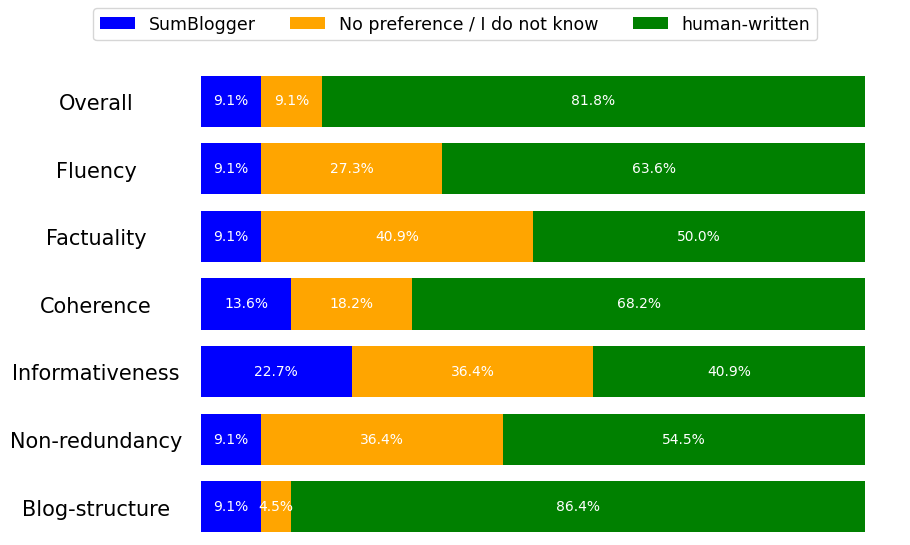

In [61]:
coverage_vs_human_df = rename_columns(coverage_vs_human_df)
barplot(coverage_vs_human_df, "SumBlogger", "human-written")

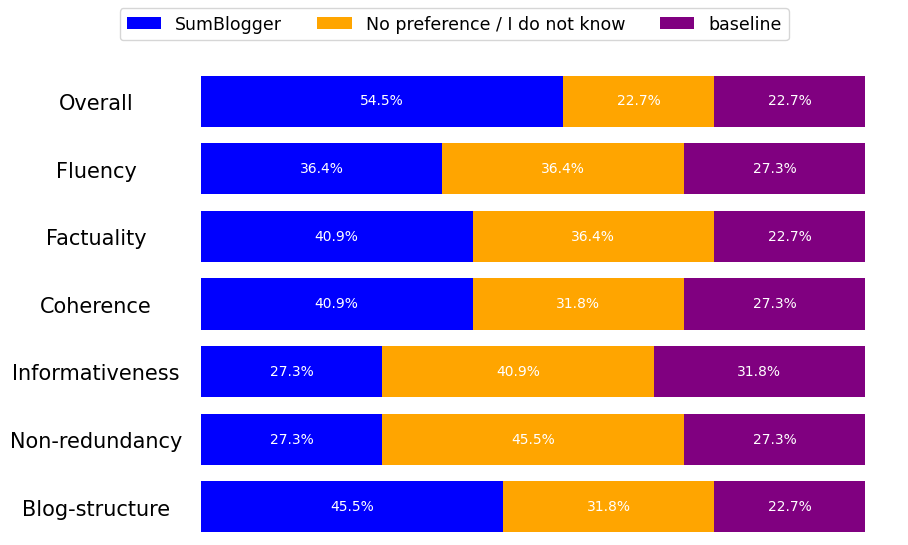

In [59]:
coverage_vs_baseline_df = rename_columns(coverage_vs_baseline_df)
barplot(coverage_vs_baseline_df, "SumBlogger", "baseline")

In [15]:

pd.set_option('display.max_colwidth', -1)

coverage_vs_human_comments_df = results_df[results_df.columns[pd.Series(results_df.columns).str.contains('CoverageVsHuman#2_')]]
coverage_vs_baseline_comments_df = results_df[results_df.columns[pd.Series(results_df.columns).str.contains('CoverageVsBaseline#2_')]]


/var/folders/g7/c3npww7d7pj41lhn1g6qm8tm0000gn/T/ipykernel_50845/4190247661.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [16]:
coverage_vs_baseline_comments_df

,CoverageVsBaseline#2_1_1,CoverageVsBaseline#2_2_1,CoverageVsBaseline#2_3_1,CoverageVsBaseline#2_4_1,CoverageVsBaseline#2_5_1,CoverageVsBaseline#2_6_1,CoverageVsBaseline#2_7_1
0,Sorry I did not have time for doing more than one.,NaN,NaN,NaN,NaN,NaN,NaN
1,Blog B has incomplete sentences and lots of repetition for introductory sentence in each section. Details like this make it more difficult to follow and less interesting to read,Blog A has complete and coherent sentences. Blog B does not always provide this.,"Similarly to previous statements, the lack of complete sentences removes from the sense of factuality.",Both blogs seem to provide coherence,Both seem to achieve relatively similar levels of informativeness,Blog B provides redundant information and repeated information in many cases.,Blog B seems too long at times even though they share similar structuring details
2,NaN,NaN,NaN,"Since, a more detailed explanation of what the article examines is provided, it is easier to follow",More detailed summary of what the paper contains(1 or 2 more sentences),NaN,Blog B has no description in the graphs and cluster to divide the papers into
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Blog A is much easier to read. Blog B is very large and there is no connection between the sentences describing the papers,NaN,NaN,"Although Blog B provides more information in the section descriptions, it is not coherent and most of the time it is just using a sentence to describe one paper without connecting the sentence to the next which is describing another one",NaN,NaN,"Blog A has a better length. The section titles are good in both, but the sections in A are better."
5,Blog A mentions fewer articles and it is easier to follow. Blog A was quite tiring to read.,NaN,NaN,NaN,NaN,NaN,"The blog structure was the same, but the length was different, so since A was shorter, it had a better structure."
6,I believe that Blog A is more brief and precise compared to Blog B. Blog B has a lot of information that I assume is not necessary,NaN,NaN,NaN,NaN,NaN,NaN
7,"Both blog posts seem to have a similiar structure. However, both are equally dense, and not easy to peruse",NaN,NaN,NaN,NaN,NaN,NaN
8,Blog B is easier to read. Blog A sounds just like a list of facts.,None,None,None,None,None,None
9,Factuality is more important than fluency so I might be inclined towards blog A even if its linguistics quality is lower.,"Blog A has the same issues I mentioned in the first part of this form. Blog B provides more fluent sentences, but still repetitive (see below).","Blog B lacks references for ""Advancements in Deep Learning"" and ""Sequence Modeling Advances"". I might fear that the article retriever has some issues so that also the other paragraphs (where references are provided) may be affected.","Blog A same as before. Blog B is more coherent, provides introductions to each subsection, but still repetitive (see below).",Same as factuality.,"Although Blog B has better linguistic quality overall, redundancies are widespread, e.g., ""This collection of scientific articles showcases"", the use of the same linking words such as ""additionally"", ""overall"", and verbs like ""propose"" and ""presents"".",NaN


In [17]:
coverage_vs_human_comments_df

,CoverageVsHuman#2_1_1,CoverageVsHuman#2_2_1,CoverageVsHuman#2_3_1,CoverageVsHuman#2_4_1,CoverageVsHuman#2_5_1,CoverageVsHuman#2_6_1,CoverageVsHuman#2_7_1
0,Sorry I did not have time for doing more than one.,NaN,NaN,NaN,NaN,NaN,NaN
1,I prefer the structure of blog B. I like the selection of 5 papers per topic and the full title of papers presented with a short summary. Information that is provided can sometimes be redundant such as how the interactive semantic map has been created.,Overall Blog B seems to provide better fluency,Both seem factual blogs but the structure of Blog B makes it easier and faster to ensure factuality since each paper and summary are more clearly separated,Both provide a sense of flow that is good.,Both blogs were very informative but blog B seems to deliver the information in a way that allows the reader to selectively read relevant information to them.,'- I did not observe any redundancy in neither of the posts,Blog B has a much better structure which allows the user to focus on topics and papers that are of interest to them directly and also clearly distinguish papers and allow more clear viewing of them.
2,"Blog B: More user friendly, the structure of is easier to follow (links are not just plain number, short explanation underneath the linked papers, variety of visualizations aiming to interpret the topic rather than visualize the correlation of the scientific papers)",NaN,NaN,NaN,"Blog A has more technical details, whereas blog B describes the topic on a high- level, thus blog B is more friendly to beginners and blog A the way-to-go for more experienced readers","In Blog A the pattern repeats over and over. There is text and the network graph of the related papers, whereas in blog B there are different visualizations in each topic, which helps to interpret the topic",NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Blog B is more readable and easy to understand. The sections are clear in both but the presentation of the papers in B is much better. The section descriptions are very good.,Blog B is fluent and easy to read. Blog A is fluent but hard to read since it combines all the papers in a paragraph,"B has much cleaner sections, it is better organised and is easier to get information about the topics and papers. On the other hand, it includes non-relevant information in the second paragraph of the opening. In contrast, Blog A has a better opening and also includes a closing paragraph about the conference.","Blog B is much more coherent, describing the section and giving information about the topic.",They both cover the conference broadly,"I did not notice any repeating on either, except that blog A may repeat a lot the connective 'and'.","The structure is much better for reading, good titles, not lengthy paragraphs and easy to read descriptions of papers along with their titles, as opposed to A."
5,"Blog B was more readable. It provides a brief description of each section and presents only 5 papers from each topic which is a reasonable amount of papers to get an idea of what is going on in each area of research. Moreover, it explains how the interactive image works, and which factors determine the size of the bubble. Overall, blog B was more readable and user-friendly.",NaN,NaN,NaN,NaN,NaN,Blog B had a clear structure that was mentioned at the beginning of the article so it was easy to follow and navigate.
6,I like the structure of the paper and the way they put the references(related work) with a brief summary and not just a reference number as usual.,NaN,NaN,NaN,NaN,NaN,NaN
7,"Blog A is monolithic in every subsection. Blog B takes the time to listicle all the papers in each section, making reading easier",NaN,NaN,NaN,"Each paper has a summary, allowing for a reduction in density of topics to read",NaN,"Blog B has a better structure. Papers are listed with summaries, allowing for easier information access"
8,Blog B is easier to read. Blog A sounds like just a list of facts.,NaN,NaN,NaN,NaN,NaN,NaN
9,"Blog 